# Load Dataset

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# read dataset and print first 5 rows
data = pd.read_csv('../data/beer_data.csv')
data.head()

,ABV,Ratings,Cellar Temperature,Score
0,6.5,22,40-45,3.28
1,5.5,1,35-40,3.52
2,8.1,3,35-40,4.01
3,NaN,0,35-40,0.00
4,6.0,1,35-40,2.73


In [6]:
# print the shape of the dataset
data.shape

(185643, 4)

# Feature Engineering

### Handle null values

In [7]:
# check null values
data.isnull().sum()

ABV                   15130
Ratings                   0
Cellar Temperature     6781
Score                     0
dtype: int64

In [8]:
# Drop null values of Cellar Temprature column
data = data[~data['Cellar Temperature'].isnull()]
data.reset_index(drop=True, inplace=True)

In [9]:
# fill ABV null values with the mean
data['ABV'].fillna(data['ABV'].mean(), inplace=True)

### Handle Categorical Values

Ratings column have numerical data but as object type and have comma included.

**For example**: 1,112

So, remove the comma and convert the datatype to float

In [10]:
# remove ',' from the Ratings' column data and convert the column to float64
data['Ratings'] = data['Ratings'].apply(lambda x: np.float64(x.replace(',', '')))

Cellar Temprature have numerical data but the data type is object.

The data is in the form of **41-42**.
So, basically the data is minimum temprature - maximum temprature. We can split this column into two separate columns.
- min_temp
- max_temp

and then convert the data to float type.

In [11]:
data['min_cellar_temp'] = data['Cellar Temperature'].apply(lambda x: int(str(x).split('-')[0].strip()))
data['max_cellar_temp'] = data['Cellar Temperature'].apply(lambda x: int(str(x).split('-')[1].strip()))

Drop Cellar Temprature column because we don't need this column

In [12]:
data.drop('Cellar Temperature', axis=1, inplace=True)

Our dataset is too large so let's shuffle the dataset and create a new dataset with the first 10,000 values 

In [13]:
from sklearn.utils import shuffle
data = shuffle(data)
dataset_1 = data[:50000]

Split data into **features** and **target**

In [14]:
# Split data into X and y
X = dataset_1.drop('Score', axis=1)
y = dataset_1['Score']

# Create Train and Test sets

In [15]:
# create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Apply Support Vector Regression

In [16]:
# import support vector regressor
from sklearn.svm import SVR

model = SVR()

# train the model using train data
model.fit(X_train, y_train)

# predict data for test set
pred = model.predict(X_test)

# evaluate the model using root mean log squared error
def rmlse(y_test, pred):
    error = np.square(np.log10(pred+1) - np.log10(y_test+1)).mean() ** 0.5
    score = 1 - error
    return score

In [17]:
# print the score
rmlse(y_test, pred)

0.7503006581836954

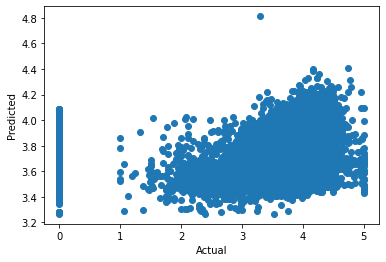

In [18]:
# plot the actual and predicted values to show the difference
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show();

In [24]:
# save the model
import pickle

pickle.dump(model, open('beer.model', 'wb'))